In [17]:
import torch
import matplotlib.pyplot as plt

In [18]:
# 1. 读取图片
img = plt.imread("../data/duck.jpg")
print(img.shape)

(1080, 1080, 3)


In [19]:
# 2. 将图片数据调整为卷积层输入特征图对应的形状
input = torch.tensor(img).permute(2,0,1).float()
print("输入特征图的形状：", input.shape)

输入特征图的形状： torch.Size([3, 1080, 1080])


In [20]:
# 3. 定义卷积层
conv = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=9, stride=3, padding=0, bias=False)

In [21]:
# 4. 前向传播，将卷积层应用到输入特征图上
output = conv(input)
print("输出特征图的形状：", output.shape)

输出特征图的形状： torch.Size([3, 358, 358])


In [22]:
# 5. 定义池化层
pool = torch.nn.MaxPool2d(kernel_size=6, stride=6, padding=1)

In [23]:
# 6. 前向传播，进行池化操作
output2 = pool(output)
print(output2.shape)

torch.Size([3, 60, 60])


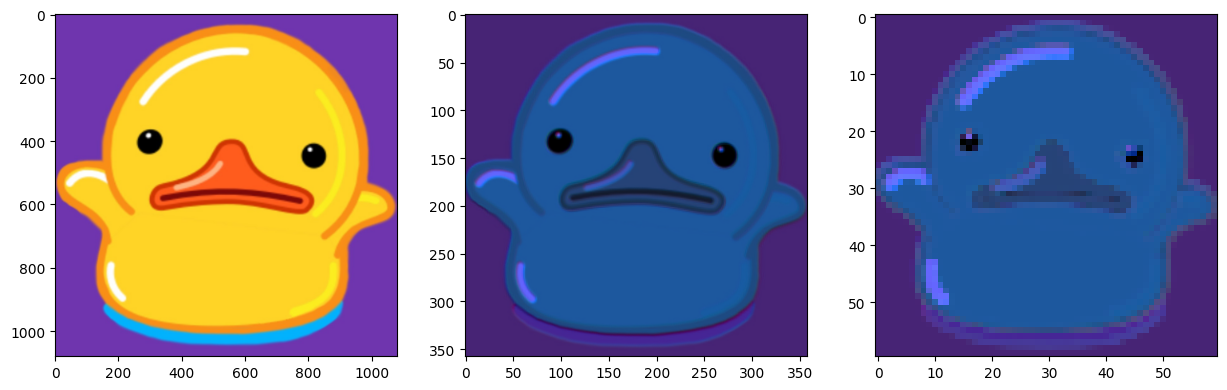

In [24]:
# 画图
output = torch.clamp(output.int(), 0, 255)
output = output.permute(1,2,0).detach().numpy()
output2 = torch.clamp(output2.int(), 0, 255)
output2 = output2.permute(1,2,0).detach().numpy()
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(img)
ax[1].imshow(output)
ax[2].imshow(output2)
plt.show()